In [245]:
# Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Исходные данные**

In [246]:
df = pd.read_csv('/content/drive/MyDrive/task_1_installs.csv', sep = ',', encoding='latin-1')
df.head()

,event_id,server_time,player_id,status,media_source,campaign,source,ad,country,is_tester,is_cheater
0,17e01f3abc2c2285348d2015b6e7146c,2021-05-09 23:58:18+00,286489d099f5ce42ba41d4e359be6c75,Organic,NaN,NaN,NaN,NaN,Thailand,False,False
1,a4e44edd31fb5c3cbdbc7d1cd8c8d596,2021-05-09 23:55:16+00,38fe2b7f96abe075046b27a1ad4928c5,Organic,NaN,NaN,NaN,NaN,New Zealand,False,False
2,94bea9c4bdbe4643cb5ba8c17ca88c9a,2021-05-09 23:53:29+00,ee1c73fe9a25990b47e7f2dec70abb07,Organic,NaN,NaN,NaN,NaN,New Zealand,False,False
3,06c9392bcf6e2f5b26e9772533f46eae,2021-05-09 23:46:40+00,6cdf4b2f81cd182954c2893fe59c9e70,Organic,NaN,NaN,NaN,NaN,Canada,False,False
4,aadaf04c42d23ab5e9a7593d04cb13d5,2021-05-09 23:45:54+00,9156c1abf7fd420a668e82b8e5a2f643,Organic,NaN,NaN,NaN,NaN,Ireland,False,False


**Первичный анализ данных. Подготовка данных.**

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129693 entries, 0 to 129692
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      129693 non-null  object
 1   server_time   129693 non-null  object
 2   player_id     129693 non-null  object
 3   status        129678 non-null  object
 4   media_source  42861 non-null   object
 5   campaign      42606 non-null   object
 6   source        34614 non-null   object
 7   ad            34369 non-null   object
 8   country       129642 non-null  object
 9   is_tester     129693 non-null  bool  
 10  is_cheater    129693 non-null  bool  
dtypes: bool(2), object(9)
memory usage: 9.2+ MB


In [248]:
df.shape

(129693, 11)

**Создадим календарный признак установки мобильной игры**

In [249]:
df['date_installation']=df['server_time'].apply(lambda x: x[0:11])
df['month_installation']=df['server_time'].apply(lambda x: x[5:7])
df.head()

,event_id,server_time,player_id,status,media_source,campaign,source,ad,country,is_tester,is_cheater,date_installation,month_installation
0,17e01f3abc2c2285348d2015b6e7146c,2021-05-09 23:58:18+00,286489d099f5ce42ba41d4e359be6c75,Organic,NaN,NaN,NaN,NaN,Thailand,False,False,2021-05-09,05
1,a4e44edd31fb5c3cbdbc7d1cd8c8d596,2021-05-09 23:55:16+00,38fe2b7f96abe075046b27a1ad4928c5,Organic,NaN,NaN,NaN,NaN,New Zealand,False,False,2021-05-09,05
2,94bea9c4bdbe4643cb5ba8c17ca88c9a,2021-05-09 23:53:29+00,ee1c73fe9a25990b47e7f2dec70abb07,Organic,NaN,NaN,NaN,NaN,New Zealand,False,False,2021-05-09,05
3,06c9392bcf6e2f5b26e9772533f46eae,2021-05-09 23:46:40+00,6cdf4b2f81cd182954c2893fe59c9e70,Organic,NaN,NaN,NaN,NaN,Canada,False,False,2021-05-09,05
4,aadaf04c42d23ab5e9a7593d04cb13d5,2021-05-09 23:45:54+00,9156c1abf7fd420a668e82b8e5a2f643,Organic,NaN,NaN,NaN,NaN,Ireland,False,False,2021-05-09,05


**Переименуем нечитабельные столбцы**

In [110]:
df.rename(columns = {'status':'type_traffic'}, inplace = True )
df.head()

,event_id,server_time,player_id,type_traffic,media_source,campaign,source,ad,country,is_tester,is_cheater,date_installation,month_installation
0,17e01f3abc2c2285348d2015b6e7146c,2021-05-09 23:58:18+00,286489d099f5ce42ba41d4e359be6c75,Organic,NaN,NaN,NaN,NaN,Thailand,False,False,2021-05-09,05
1,a4e44edd31fb5c3cbdbc7d1cd8c8d596,2021-05-09 23:55:16+00,38fe2b7f96abe075046b27a1ad4928c5,Organic,NaN,NaN,NaN,NaN,New Zealand,False,False,2021-05-09,05
2,94bea9c4bdbe4643cb5ba8c17ca88c9a,2021-05-09 23:53:29+00,ee1c73fe9a25990b47e7f2dec70abb07,Organic,NaN,NaN,NaN,NaN,New Zealand,False,False,2021-05-09,05
3,06c9392bcf6e2f5b26e9772533f46eae,2021-05-09 23:46:40+00,6cdf4b2f81cd182954c2893fe59c9e70,Organic,NaN,NaN,NaN,NaN,Canada,False,False,2021-05-09,05
4,aadaf04c42d23ab5e9a7593d04cb13d5,2021-05-09 23:45:54+00,9156c1abf7fd420a668e82b8e5a2f643,Organic,NaN,NaN,NaN,NaN,Ireland,False,False,2021-05-09,05


In [251]:
df = df.mask(df.isin(['', 0])).ffill()
df.head()

,event_id,server_time,player_id,status,media_source,campaign,source,ad,country,is_tester,is_cheater,date_installation,month_installation
0,17e01f3abc2c2285348d2015b6e7146c,2021-05-09 23:58:18+00,286489d099f5ce42ba41d4e359be6c75,Organic,NaN,NaN,NaN,NaN,Thailand,NaN,NaN,2021-05-09,05
1,a4e44edd31fb5c3cbdbc7d1cd8c8d596,2021-05-09 23:55:16+00,38fe2b7f96abe075046b27a1ad4928c5,Organic,NaN,NaN,NaN,NaN,New Zealand,NaN,NaN,2021-05-09,05
2,94bea9c4bdbe4643cb5ba8c17ca88c9a,2021-05-09 23:53:29+00,ee1c73fe9a25990b47e7f2dec70abb07,Organic,NaN,NaN,NaN,NaN,New Zealand,NaN,NaN,2021-05-09,05
3,06c9392bcf6e2f5b26e9772533f46eae,2021-05-09 23:46:40+00,6cdf4b2f81cd182954c2893fe59c9e70,Organic,NaN,NaN,NaN,NaN,Canada,NaN,NaN,2021-05-09,05
4,aadaf04c42d23ab5e9a7593d04cb13d5,2021-05-09 23:45:54+00,9156c1abf7fd420a668e82b8e5a2f643,Organic,NaN,NaN,NaN,NaN,Ireland,NaN,NaN,2021-05-09,05


**2. Основные задачи**

**2.1.** Составить графики числа установок (ось Y) по каледарным дням (ось X) в разбивке на типы трафика и маркетинговые каналы. Вам нужно самим определить, в каких полях хранятся нужные вам данные. Форма графика - свободная (гистограмма / line plot / stacked plot).

In [238]:
# Готовим данные для графика 1
data = df['type_traffic'].value_counts()
data.index = ['привлеченный трафик', 'органический трафик',]

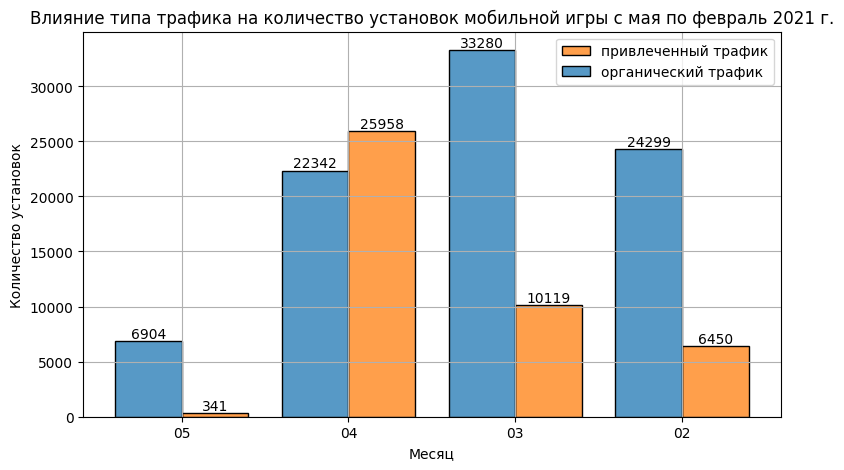

In [239]:
plt.figure(figsize=(9,5))
ax=sns.histplot(data=df, x="month_installation", hue="type_traffic", multiple="dodge", shrink=.8)
plt.title('Влияние типа трафика на количество установок мобильной игры с мая по февраль 2021 г.')
plt.xlabel('Месяц')
plt.ylabel('Количество установок')
plt.legend(data.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.grid();

In [241]:
# Готовим данные для графика 2
data = df['media_source'].value_counts()
data.index = ['Restricted', 'TikTok', 'Google_Adwords', 'FacebookAds',  'UnityAds', 'RTB']

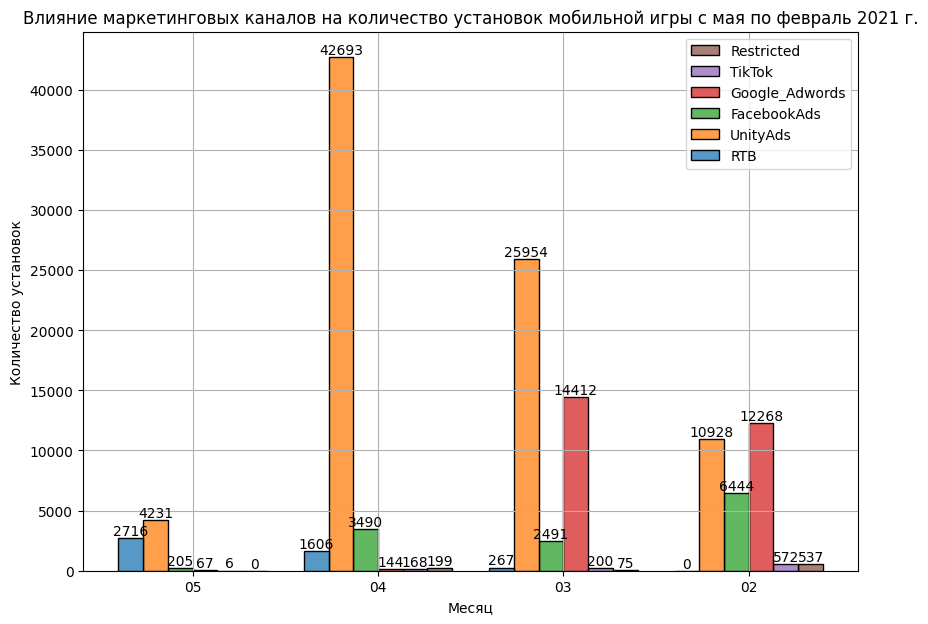

In [242]:
plt.figure(figsize=(10,7))
ax=sns.histplot(data=df, x="month_installation", hue="media_source", multiple="dodge", shrink=.8)
plt.title('Влияние маркетинговых каналов на количество установок мобильной игры с мая по февраль 2021 г.')
plt.xlabel('Месяц')
plt.ylabel('Количество установок')
plt.legend(data.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.grid();

**2.2.** На основе полученных графиков необходимо сделать ряд наблюдений. Опишите словами, что вам удалось заметить по динамике маркетинговых каналов.

Для графика **"Влияние типа трафика на количество установок мобильной игры с мая по февраль 2021 г."**, можно сделать следующие выводы:<br>
1. Наибольшое влияние на количество установок мобильной игры за рассматриваемый период повлиял органический трафик, за исключением апреля, где в лидеры вырвался привлеченный трафик; <br>
2. Наибольшее количество установок мобильной игры за рассматриваемый период было в апреле, аутсайдером периода является май.<br>

Для графика **"Влияние маркетинговых каналов на количество установок мобильной игры с мая по февраль 2021 г."**, можно сделать следующие выводы:<br>
1. Наибольшее влияние на установку мобильной игры за рассматриваемый период оказывает следующие маркетинговые каналы: UnityAds (1-ое место), Google_Adwords (2-ое место), FacebookAds ( 3-е место). <br>
Аутсайдерами по привлечению пользователей являются: RTB, Restricted и TikTok маркетинговые каналы;<br>
2.  Наибольшее количество привлеченных пользователей было в апреле за счет UnityAds маркетингового канала, аутсайдером периода является майь.<br>